# Flights Data Exploration
## by Ibrahim Alraigi

## Preliminary Wrangling

> Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is our chance to find out!

That was the challenge by RITA when they provided this dataset, it consists of flight arrival and departure details for all commercial flights within the USA for the year 2008. It is a huge "Airline on-time performance" dataset that contains 7,009,728 flights with 29 features. 

In [161]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [162]:
# loading the dataset
df = pd.read_csv('flights_2008.csv')

In [163]:
print(df.shape)
print(df.info(null_counts=True))

(7009728, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 7009728 non-null int64
Month                7009728 non-null int64
DayofMonth           7009728 non-null int64
DayOfWeek            7009728 non-null int64
DepTime              6873482 non-null float64
CRSDepTime           7009728 non-null int64
ArrTime              6858079 non-null float64
CRSArrTime           7009728 non-null int64
UniqueCarrier        7009728 non-null object
FlightNum            7009728 non-null int64
TailNum              6926363 non-null object
ActualElapsedTime    6855029 non-null float64
CRSElapsedTime       7008884 non-null float64
AirTime              6855029 non-null float64
ArrDelay             6855029 non-null float64
DepDelay             6873482 non-null float64
Origin               7009728 non-null object
Dest                 7009728 non-null object
Distance             7009728 non-null int64
TaxiIn             

In [164]:
#temporaly display all 29 columns
with pd.option_context('display.max_columns', 29):
    display(df.head(10))

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,NaN,0,10.0,0.0,0.0,0.0,47.0
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,N428WN,233.0,250.0,219.0,-18.0,-1.0,IND,LAS,1591,7.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,617.0,615,652.0,650,WN,11,N689SW,95.0,95.0,70.0,2.0,2.0,IND,MCI,451,6.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,N648SW,79.0,95.0,70.0,-16.0,0.0,IND,MCI,451,3.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


### Issues:
- `DepDelay` has some missing values, we will fix that by discovering a pattern that is related to those missing data or if we couldn't find one, we will just drop them since they represent only a very small portion
- `DepTime, CRSDepTime, ArrTime, CRSArrTime` are of type float rather than timedelta object
- `CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay, CancellationCode` have both NaN's and 0's, covert all to 0's
- Add column `Delayed` if the flight is delayed based on `DepDelay` as 1 (Yes) or 0 (No)

In [165]:
df_clean = df.copy()

**Issue #1 DepDelay has some missing values, we will fix that by discovering a pattern that is related to those missing data or if we couldn't find one, we will just drop them since they represent only a very small portion**

In [166]:
df[df.DepDelay.isnull()].head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
178,2008,1,3,4,NaN,700,NaN,830,WN,126,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
373,2008,1,3,4,NaN,1100,NaN,1215,WN,1146,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
399,2008,1,3,4,NaN,905,NaN,1025,WN,469,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
401,2008,1,3,4,NaN,1620,NaN,1740,WN,618,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
415,2008,1,3,4,NaN,1930,NaN,2035,WN,2528,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
676,2008,1,3,4,NaN,845,NaN,1140,WN,437,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
686,2008,1,3,4,NaN,1925,NaN,2045,WN,934,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
727,2008,1,3,4,NaN,600,NaN,805,WN,3326,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
881,2008,1,3,4,NaN,1110,NaN,1215,WN,1402,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
884,2008,1,3,4,NaN,1445,NaN,1550,WN,2205,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


It appears like we already discovered the pattern, all of them got canceled instead 

In [167]:
df[df.DepDelay.isnull()].Cancelled.mean()

1.0

Yes, all the flights records that have `DepDelay` with NaN's actually got cancelled, so we will just fill the NaN's with the `DepTime` mean

In [168]:
df_clean['DepDelay'].fillna(df_clean['DepDelay'].mean(), inplace=True)

**Issue #2 `DepTime, CRSDepTime, ArrTime, CRSArrTime` are of type float rather than timedelta object**

In [169]:
# converting DepTime, CRSDepTime, ArrTime, CRSArrTime to timedelta
def change_to_timedelta(column):
    df[column].fillna(0, inplace=True)
    df_clean[column] = df[column].astype(int).astype(str).str.zfill(4)
    df_clean[column] = df_clean[column].str[:2] + ':' + df_clean[column].str[2:] + ':00'
    df_clean[column] = pd.to_timedelta(df_clean[column])
    
col_list = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
for col in col_list:
    change_to_timedelta(col)

In [170]:
df_clean[col_list].head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime
0,20:03:00,19:55:00,22:11:00,22:25:00
1,07:54:00,07:35:00,10:02:00,10:00:00
2,06:28:00,06:20:00,08:04:00,07:50:00
3,09:26:00,09:30:00,10:54:00,11:00:00
4,18:29:00,17:55:00,19:59:00,19:25:00


**Issue #3 `CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay, CancellationCode` have both NaN's and 0's, covert all to 0's**

In [171]:
# converting all NaN's to 0's in columns CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay
col_list = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'CancellationCode']
for col in col_list:
    df_clean[col].fillna(0, inplace=True)

print(df_clean[col_list].isnull().sum())

CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
CancellationCode     0
dtype: int64


**Issue #4 Add column `Delayed` if the flight is delayed based on `DepDelay` as 1 (Yes) or 0 (No)**

In [172]:
# adding column `Delayed` if the flight is delayed based on `DepDelay` as 1 (Yes) or 0 (No)
df_clean['Delayed'] = df['DepDelay'].apply(lambda x : 1 if x > 0 else 0)
df_clean[['Delayed', 'DepDelay']].head()

,Delayed,DepDelay
0,1,8.0
1,1,19.0
2,1,8.0
3,0,-4.0
4,1,34.0


In [173]:
# our final clean dataset
# temporaly display all 30 columns
with pd.option_context('display.max_columns', 30):
    display(df_clean.head())

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed
0,2008,1,3,4,20:03:00,19:55:00,22:11:00,22:25:00,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,0,0,0.0,0.0,0.0,0.0,0.0,1
1,2008,1,3,4,07:54:00,07:35:00,10:02:00,10:00:00,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,0,0,0.0,0.0,0.0,0.0,0.0,1
2,2008,1,3,4,06:28:00,06:20:00,08:04:00,07:50:00,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,0,0,0.0,0.0,0.0,0.0,0.0,1
3,2008,1,3,4,09:26:00,09:30:00,10:54:00,11:00:00,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0
4,2008,1,3,4,18:29:00,17:55:00,19:59:00,19:25:00,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,0,0,2.0,0.0,0.0,0.0,32.0,1


In [174]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 30 columns):
Year                 7009728 non-null int64
Month                7009728 non-null int64
DayofMonth           7009728 non-null int64
DayOfWeek            7009728 non-null int64
DepTime              7009728 non-null timedelta64[ns]
CRSDepTime           7009728 non-null timedelta64[ns]
ArrTime              7009728 non-null timedelta64[ns]
CRSArrTime           7009728 non-null timedelta64[ns]
UniqueCarrier        7009728 non-null object
FlightNum            7009728 non-null int64
TailNum              6926363 non-null object
ActualElapsedTime    6855029 non-null float64
CRSElapsedTime       7008884 non-null float64
AirTime              6855029 non-null float64
ArrDelay             6855029 non-null float64
DepDelay             7009728 non-null float64
Origin               7009728 non-null object
Dest                 7009728 non-null object
Distance             7009728 non-null int

Good, now we don't have nulls in the variables of intreset

### What is the structure of your dataset?

We have a large "Airline on-time performance" dataset that contains 7,009,728 flights with 29 features. The dataset was in year 2008.

Some issues were found and resolved to make the dataset better for analyzing and visualizing, such as errornus data types, inconsistent null value and some missing usefull columns.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out the following:
- what features are best for predicting whether there will be a delay for the flight or not.
- what features are best for predicting whether the flight will be canceled or not.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The dataset was posted intentionally vague in order to allow different entries to focus on different aspects of the data, but generally speaking features such as Origin, Weather, Diverted flights and Carrier might have major effect in delaying or canceling a flight.

## Univariate Exploration

let's start by looking at the main variable of interest

In [175]:
df_clean.Delayed.mean()

0.3853179467163348

39% flights are delayed, that's high! but it may be only a few minutes, lets check delay in minutes against flights count

In [176]:
df_clean[df_clean['DepDelay'] > 0].DepDelay.describe()

count    2.837220e+06
mean     3.066177e+01
std      4.782056e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.300000e+01
75%      3.600000e+01
max      2.467000e+03
Name: DepDelay, dtype: float64

In [177]:
colors = sb.color_palette("colorblind")
color = colors[4]

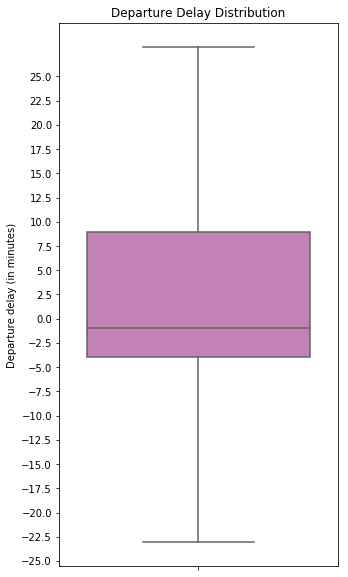

In [178]:
# seems like we have outliers, hence, we won't show them for better visualization 
plt.figure(figsize=[5, 10])
sb.boxplot(y="DepDelay", data=df_clean, color=color, showfliers=False)
plt.ylabel('Departure delay (in minutes)')
plt.yticks(np.arange(-25, 25+2.5, 2.5))
plt.title('Departure Delay Distribution')
plt.show();

As we can see, most `DepDelay` data fall between -5 and 10 mins

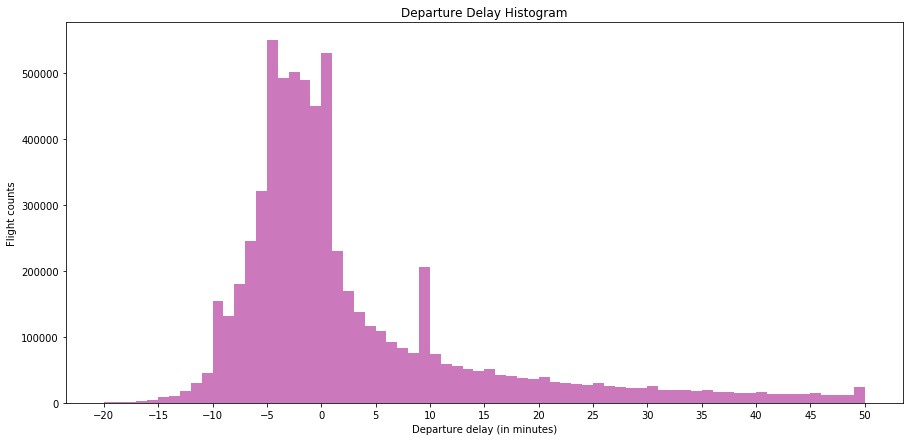

In [179]:
bins = np.arange(-20, 50+1, 1)
plt.figure(figsize=[15, 7])
plt.hist(data = df_clean, x = 'DepDelay', bins = bins, color=color);
plt.xlabel('Departure delay (in minutes)')
plt.ylabel('Flight counts')
plt.xticks(np.arange(-20, 50+5, 5))
plt.title('Departure Delay Histogram')
plt.show();

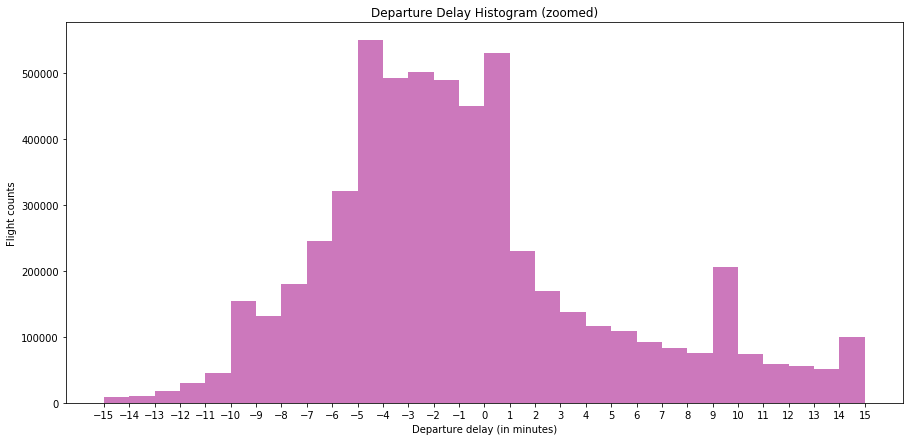

In [180]:
# zooming further 
bins = np.arange(-15, 15+1, 1)
plt.figure(figsize=[15, 7])
plt.hist(data = df_clean, x = 'DepDelay', bins = bins, color=color);
plt.xlabel('Departure delay (in minutes)')
plt.ylabel('Flight counts')
plt.xticks(np.arange(-15, 15+1, 1))
plt.title('Departure Delay Histogram (zoomed)')
plt.show()

That clearly illustrates how `DepDelay` data are roughly clustered around -10 and +10

Since 39% delay rate does not seem practical, I will now make the `Delayed` column "True" only if the departure delay is grater than 5 minutes 

In [181]:
df_clean['Delayed'] = df['DepDelay'].apply(lambda x : 1 if x > 5 else 0)
df_clean[['Delayed', 'DepDelay']].head()

,Delayed,DepDelay
0,1,8.0
1,1,19.0
2,1,8.0
3,0,-4.0
4,1,34.0


In [182]:
df_clean.Delayed.mean()

0.2762957421457723

delay rate dropped to 28%, that is more reasonable

Let's check different types of delayes, that are the ones in columns:CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay

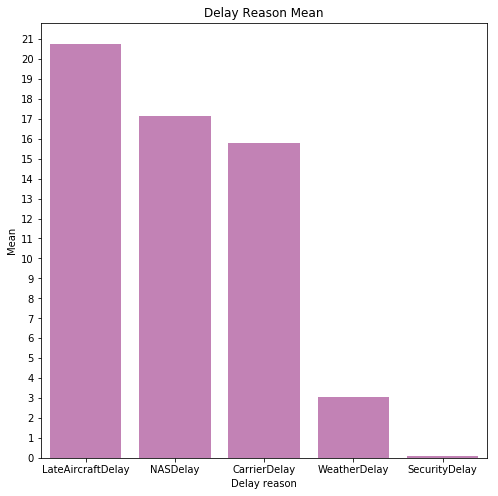

In [183]:
col_list = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
y = df[col_list].mean().sort_values(ascending=False)
x = y.index

plt.figure(figsize=[8, 8])
sb.barplot(y = y, x = x, color = color, )
plt.ylabel('Mean')
plt.xlabel('Delay reason')
plt.title('Delay Reason Mean')
plt.yticks(np.arange(0, df[col_list].mean().max()+1, 1))
plt.show()

Surprisingly, the weather doesn't contribute as I expected in causing delays (though its contribution might be is in canceling flights), its contribution is only 3%! whereas 'LateAircraftDelay', 'NASDelay' and 'CarrierDelay' are contributing the most in causing delay respectively.

Let's now check cancelled flights rate

In [184]:
df_clean.Cancelled.mean()

0.019606181580797428

We have around 2% cancelled flights 

Let's also check different types of cancellation

In [185]:
df_clean.CancellationCode.unique()

array([0, 'A', 'C', 'B', 'D'], dtype=object)

CancellationCode = reason for cancellation (0 = Not cancelled, A = carrier, B = weather, C = NAS, D = security)

In [186]:
df_clean.groupby(['CancellationCode']).size()

CancellationCode
0    6872294
A      54330
B      54904
C      28188
D         12
dtype: int64

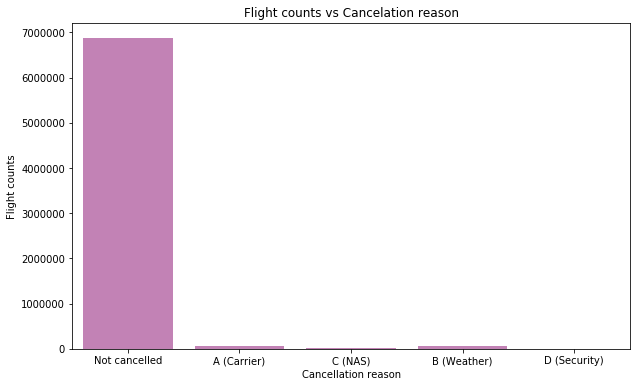

In [187]:
ticks = ['Not cancelled', 'A (Carrier)', 'C (NAS)', 'B (Weather)', 'D (Security)'];
plt.figure(figsize=[10, 6])
fig = sb.countplot(data = df_clean, x = 'CancellationCode', color = color);
fig.set_xticklabels(ticks)
plt.ylabel('Flight counts')
plt.xlabel('Cancellation reason')
plt.title('Flight counts vs Cancelation reason')
plt.show()

Since most of flights were not cancelled, we should eliminate the "Not cancelled" for better visuallaization

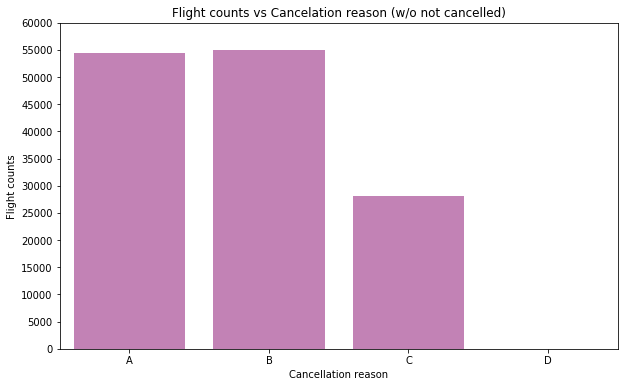

In [188]:
ticks = ['A', 'B', 'C', 'D'];

plt.figure(figsize=[10, 6])
sb.countplot(data = df_clean, x = 'CancellationCode', color = color, order=ticks)
plt.yticks(np.arange(0, 60000+5000, 5000))
plt.ylabel('Flight counts')
plt.xlabel('Cancellation reason')
plt.title('Flight counts vs Cancelation reason (w/o not cancelled)')
plt.show()

We already have good visualization about the distribution of which reasons are contributing the most, but let's check them as percentages

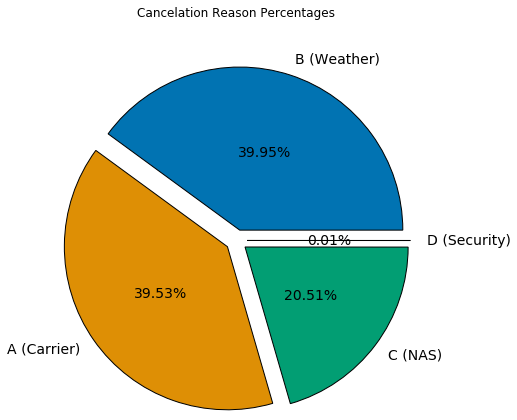

In [189]:
y = np.array(list(df_clean[df_clean['CancellationCode'] != 'None']['CancellationCode'].value_counts())[1:5])
labels = ['B (Weather)', 'A (Carrier)', 'C (NAS)', 'D (Security)']
explode = (0.1, 0.1, 0.1, 0.1)
wedgeprops={"edgecolor":"k", 'antialiased': True}

plt.pie(y, labels=labels, autopct='%1.2f%%', pctdistance=0.5, 
        labeldistance=1.1, radius=1.5, textprops={'fontsize': 14}, 
        explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.title('Cancelation Reason Percentages')
plt.ylim([0,2])
plt.show()

As we can see, almost 80% of flights getting canceled are either because of `B (Weather)` or `A (Carrier)`, they both have the greatest contribution in canceling flights, the remaining 20% is because of `C (NAS)`. The `D (Security)` very small and negligible contribution.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- For the `Delayed` variable, at first, when I considered any flight with `Departure delay > 0` is a delayed flight, almost 40% of flights are delayed, which is unusual. After invistigation with data visualaization, we found that many flights are delayed with around 5 minutes, so I changed the threshhold to be 5 minutes which reduced the delayed flights percentage to 28%, which is more reasonable. 
- For the `Cancelled` variable, only 1% of flights are cancelled, and that actually make sense so we didn't need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- I added a new column `Delayed` if the flight is delayed or not based on `DepDelay`, if it's greater than 5 minutes it's considered to be felayed, as 1 (Yes) or 0 (No). 
- Many outliers were found in column `DepDelay`, they were ignored in visualization so that we can draw better conclusions
- In both variables of intrest, there were NaN's instead of 0's, so that was changed to 0's for easier processing

## Bivariate Exploration

Let's start with the paiwise correlation between our variables of intrest (`Delayed` and `Cancelled`) and other variables.

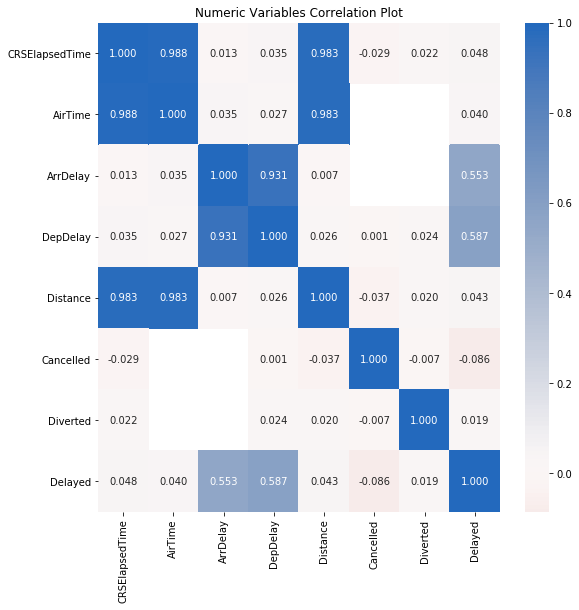

In [190]:
# correlation plot
numeric_vars = ['CRSElapsedTime', 'AirTime', 'ArrDelay', 
                'DepDelay', 'Origin', 'Dest', 'Distance', 
                'Cancelled', 'Diverted', 'Delayed']
plt.figure(figsize = [9, 9])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Numeric Variables Correlation Plot')
plt.show()

As we can see, nothing major to observe or unusual here, mainly we have these expected correlations:
- `DepDelay` with `ArrDelay`, which will cause delay for next flight since `Delayed` depends on `DepDelay`
- Between the three variables `ElapsedTime`, `AirTime` and `Distance`.

Let's check other nun-numeric (categorical) features that may have some effects on delaying or canelling flights such as Origin, Diverted flights and Carrier

In [191]:
def bar_by_column(col, against):
    flights_counts = (df_clean.groupby([col])[against]
                         .value_counts(normalize=True)
                         .rename(against+' (%)')
                         .mul(100)
                         .reset_index()
                         .sort_values(against+' (%)', ascending=False))

    plt.figure(figsize=[16,8])
    plt.yticks([])
    plt.title(col + ' vs. ' + against+' (%)')
    

    g = sb.barplot(x=col, y=against+' (%)', hue=against, data=flights_counts, palette='Blues')

    # write percentages above bars 
    for p in g.patches:
        g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', fontsize=12, xytext=(0, 10), textcoords='offset points', )
    
    # change legend
    leg = g.axes.get_legend()
    labels = ['No', 'Yes']
    for t, l in zip(leg.texts, labels): t.set_text(l)
    
    # To make space for the annotations
    _ = g.set_ylim(0, 110) 

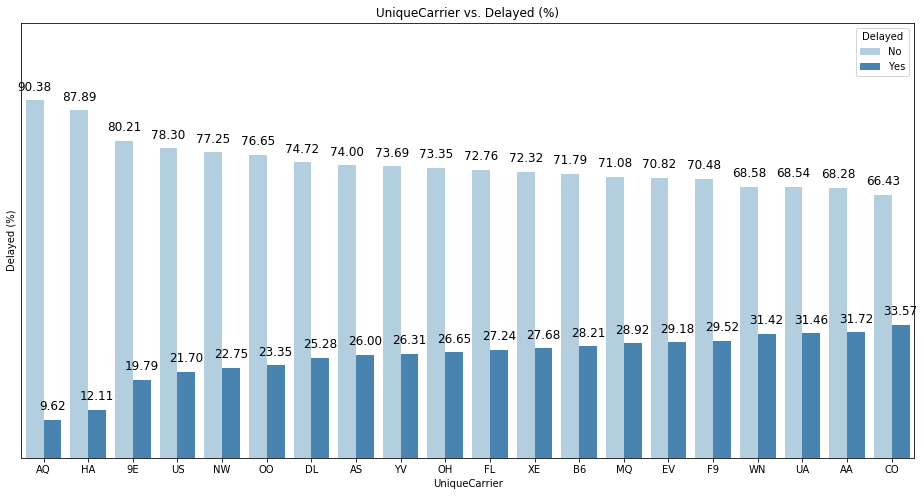

In [192]:
bar_by_column('UniqueCarrier', 'Delayed')

So as we can see the carriers definitely affects delaying flights, as we go to the left a carrier has fewer flights on time, or in other words, more likely to delay a flight. For example, carriers like CD, AA, UA, WN and MQ have delaying rates between 34% and 29% respectively, while AQ and HA have delaying rates between 12% and 10% respectively.

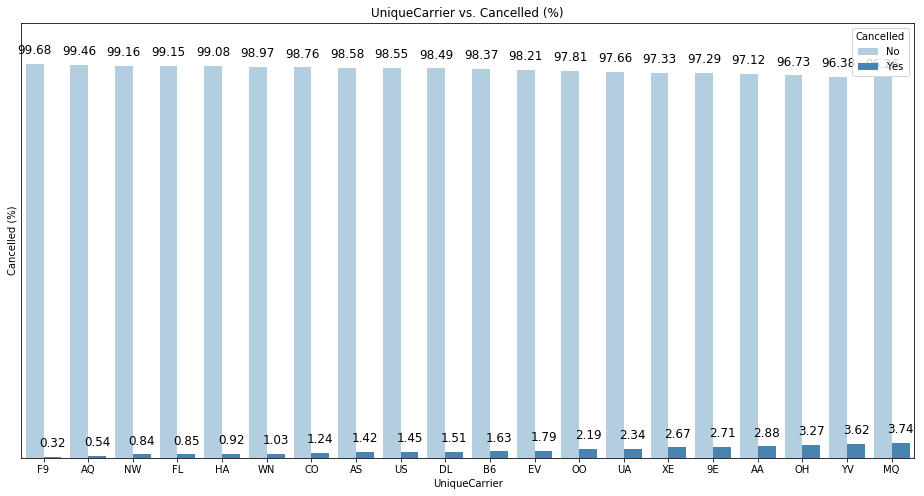

In [193]:
bar_by_column('UniqueCarrier', 'Cancelled')

Carriers also have a say in canceling flights, but the effect seems not to be as variant as delaying rates, with a maximum of 3.7% for MQ and a minimum of 0.3% for F9

Let's move to another categorical variable, let's now check how Origin affects delaying and canceling flights

In [194]:
# defining a function that convert value counts to percentages
def get_counts_percentages(data, col, against):
    flights_counts = (data.groupby([col])[against]
                         .value_counts(normalize=True)
                         .rename(against+' (%)')
                         .mul(100)
                         .reset_index()
                         .sort_values(against+' (%)', ascending=False))

    return flights_counts.query(against+' == 1 ')[[col, against+' (%)']]

delayed_flights_by_origin = get_counts_percentages(df_clean, 'Origin', 'Delayed')
delayed_flights_by_origin.head()

,Origin,Delayed (%)
464,PUB,100.000000
24,AKN,62.068966
446,PIR,60.000000
166,DLG,56.034483
16,ADK,51.960784


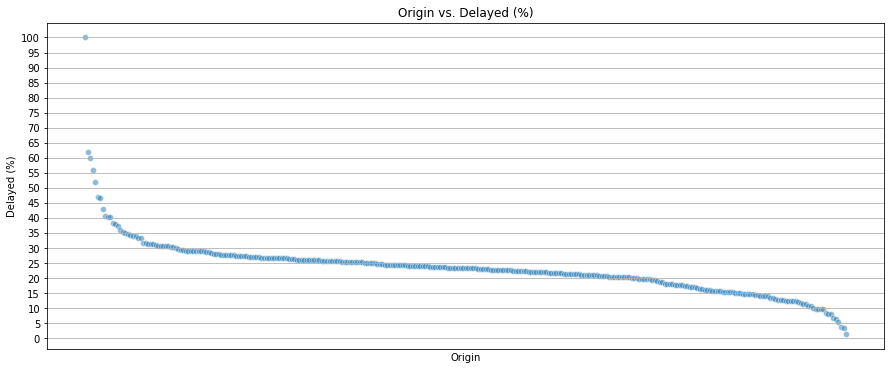

In [195]:
def scatter_by_column(data, col, against):
    plt.figure(figsize=[15,6])
    sb.scatterplot(data=data, x=col, y=against+' (%)', alpha=.5)
    plt.yticks(np.arange(0,data[against+' (%)'].max()+5,5))
    plt.grid()
    plt.xticks([]);
    plt.title(col + ' vs. ' + against+' (%)');
    
    
scatter_by_column(delayed_flights_by_origin, 'Origin', 'Delayed')

In total, we have 303 different origins, but before we do any elicitation, some origins seem to be off, like the one with 100% delay rate, so let's fix that for better visualization

In [196]:
delayed_flights_by_origin[delayed_flights_by_origin['Delayed (%)'] == 100]

,Origin,Delayed (%)
464,PUB,100.0


In [197]:
df_clean.query('Origin == "PUB"')[['Origin', 'Delayed']]

,Origin,Delayed
3701794,PUB,1
3702095,PUB,1


As expected, only two flights were there for this Origin and both of them got delayed, so we will just exclude those orgins that have few flights 

In [198]:
print(df_clean.groupby('Origin').size().describe())
print(df_clean.groupby('Origin').size().sort_values().head(20))

count       303.000000
mean      23134.415842
std       50462.325797
min           2.000000
25%        1324.000000
50%        4262.000000
75%       16329.500000
max      414513.000000
dtype: float64
Origin
PUB      2
PIR      5
TUP     10
INL     72
BJI     74
GST     85
ADK    102
DLG    116
ACY    116
AKN    116
BLI    120
SUX    122
ITH    132
HTS    158
LWB    185
TEX    194
RHI    221
WYS    264
PLN    264
BPT    276
dtype: int64


In [199]:
# let's make first quartile acts as a threshhold 
data = df_clean.groupby('Origin').size()
mask = data.apply(lambda x: x >= 1324)
origins = data[np.where(mask)[0]].index

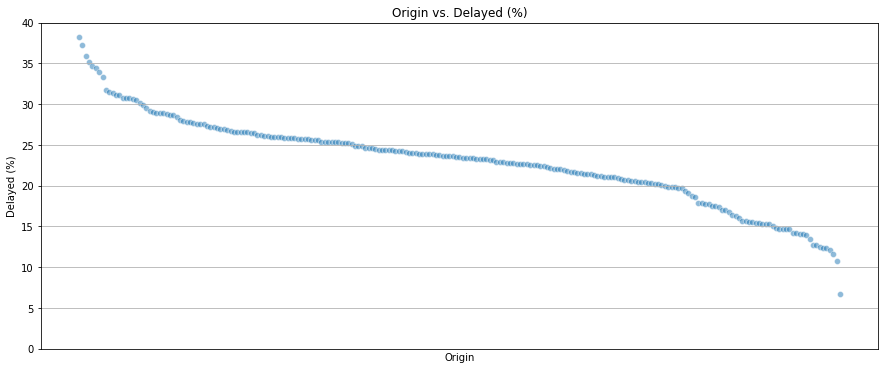

In [200]:
data = df_clean[df_clean['Origin'].isin(origins)]
delayed_flights_by_origin = get_counts_percentages(data, 'Origin', 'Delayed')

scatter_by_column(delayed_flights_by_origin, 'Origin', 'Delayed')

In [201]:
delayed_flights_by_origin['Delayed (%)'].describe()

count    227.000000
mean      23.043760
std        5.286601
min        6.751055
25%       20.326262
50%       23.477898
75%       26.061682
max       38.211341
Name: Delayed (%), dtype: float64

So origins do have an impact on delaying flights, the majority tend to have delays between 15% and 30%, nonetheless, we have some origins with very low or very high rates. 

The origins with low delay rates are clustered between 7% and 20% and the ones with high delay rates are clustered between 27% and 40%.

Now, let's also check how origins affect cancelling flight rates 

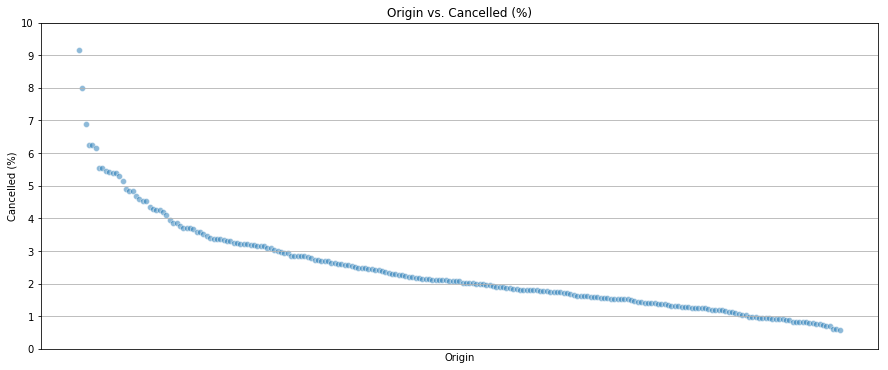

In [202]:
# we will use the same data that excluded those orgins with few flights
cancelled_flights_by_origin = get_counts_percentages(data, 'Origin', 'Cancelled')

scatter_by_column(cancelled_flights_by_origin, 'Origin', 'Cancelled')
plt.yticks(np.arange(0,cancelled_flights_by_origin['Cancelled (%)'].max()+1,1));

In [203]:
cancelled_flights_by_origin['Cancelled (%)'].describe()

count    227.000000
mean       2.397926
std        1.404443
min        0.574351
25%        1.410436
50%        2.064837
75%        3.099045
max        9.157716
Name: Cancelled (%), dtype: float64

So origins seem to also affect canceling flights but very weakly. Most origins have canceling rates between 1.5% and 3% which are very close to each other, so they can be considered negligible.

In [204]:
df_clean.groupby('Dest').size().describe()

count       304.000000
mean      23058.315789
std       50401.780012
min           2.000000
25%        1309.000000
50%        4251.500000
75%       16261.500000
max      414521.000000
dtype: float64

So again, to avoid the misleading few flight counts per destination visuals, let's only exclude those with few flights

In [205]:
# let's make first quartile acts as a threshhold 
data = df_clean.groupby('Dest').size()
mask = data.apply(lambda x: x >= 1309)
dests = data[np.where(mask)[0]].index

Text(0.5, 1.0, 'Destination vs. Delayed (%)')

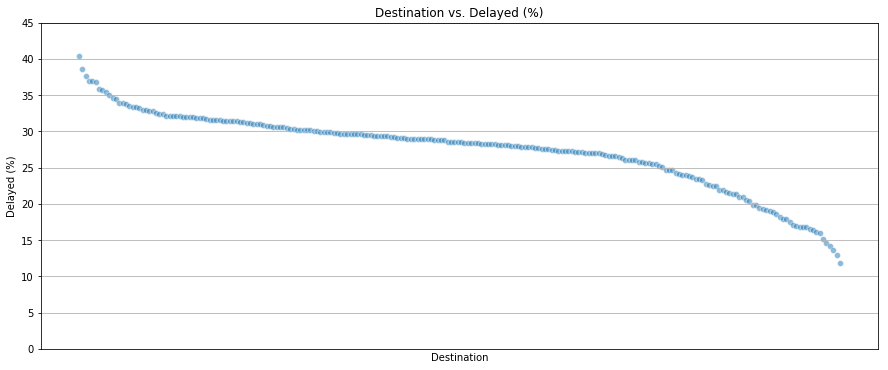

In [206]:
data = df_clean[df_clean['Dest'].isin(dests)]
delayed_flights_by_dest = get_counts_percentages(data, 'Dest', 'Delayed')

scatter_by_column(delayed_flights_by_dest, 'Dest', 'Delayed')
plt.xlabel('Destination');
plt.title('Destination vs. Delayed (%)')

In [207]:
delayed_flights_by_dest['Delayed (%)'].describe()

count    228.000000
mean      27.513156
std        5.165485
min       11.906270
25%       25.569881
50%       28.554081
75%       30.725408
max       40.335473
Name: Delayed (%), dtype: float64

So destinations just like origins affects flight delaying rates, and in a very similar manner, the majority tend to have delays between 20% and 30%, whereas the destinations with low delay rates are clustered between 10% and 20% and the ones with high delay rates are clustered between 30% and 40%.

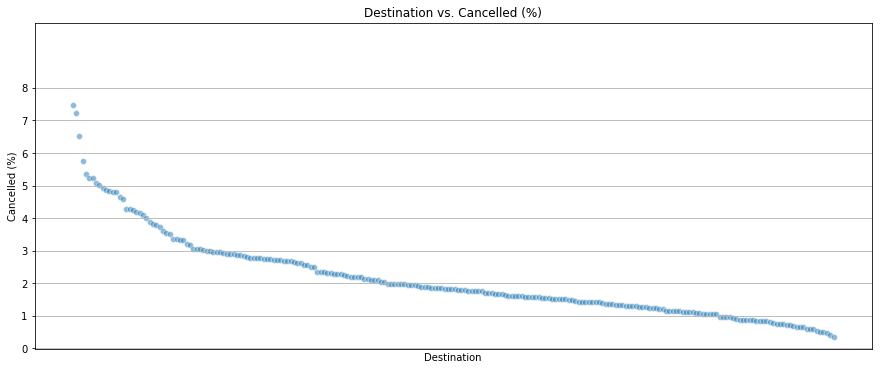

In [208]:
cancelled_flights_by_dest = get_counts_percentages(data, 'Dest', 'Cancelled')

scatter_by_column(cancelled_flights_by_dest, 'Dest', 'Cancelled')
plt.yticks(np.arange(0,cancelled_flights_by_dest['Cancelled (%)'].max()+1,1));
plt.xlabel('Destination')
plt.title('Destination vs. Cancelled (%)');

In [209]:
cancelled_flights_by_dest['Cancelled (%)'].describe()

count    228.000000
mean       2.139699
std        1.273947
min        0.346157
25%        1.269406
50%        1.816438
75%        2.762238
max        7.476636
Name: Cancelled (%), dtype: float64

Destinations are affecting flights cancelation rates in a similar manner, even slightly less, with a median of 1.8% and a standard deviation of 1.27% only. So they seem to be negligible regarding flights cancellation rates.

Next, let's check if the day of the week affect the delaying and cancelling rates

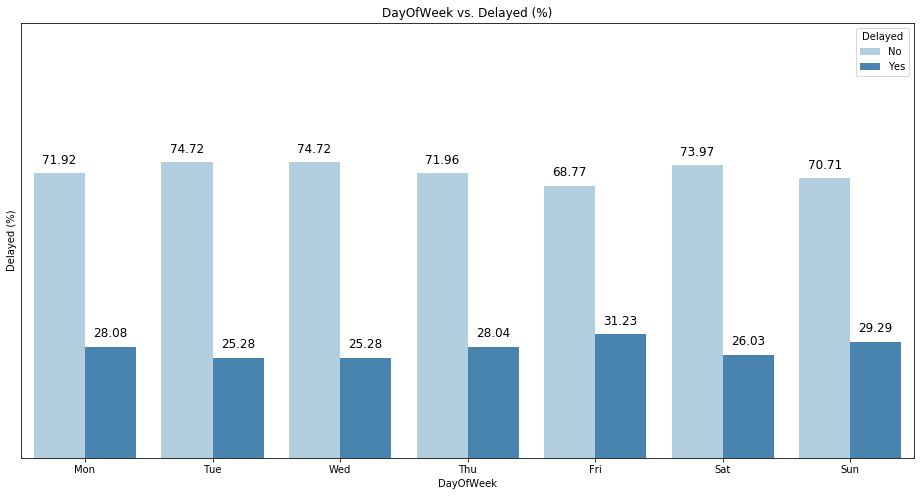

In [210]:
bar_by_column('DayOfWeek', 'Delayed')
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(range(len(days)), days);

Delaying rates are slightly different based on the day of the week. On Fridays, there's a 31.2% chance that a flight get delayed, while on Wednesdays, that chance will be reduced to 25.2%. Other days seem to have close rates ranging from 26% to 29%

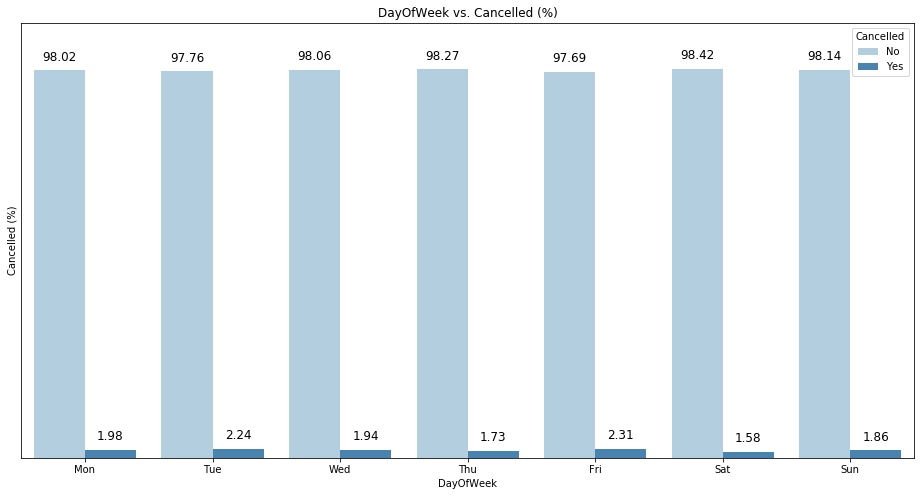

In [211]:
bar_by_column('DayOfWeek', 'Cancelled')
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(range(len(days)), days);

The day of the week seems not to affect flight cancellation rates, as we have a minimum of 1.58% on Satarday's and a maximum of 2.31% on Friday's, which are very close to each other.

Let's also check how scheduled departure time affects delaying or canceling flights

In [212]:
df_clean.CRSDepTime.nunique()

1217

So we have so many different times, but some of them may have appeared only a few times so let's check that

In [213]:
df_clean.CRSDepTime.value_counts().describe()

count      1217.000000
mean       5759.842235
std       10903.065807
min           1.000000
25%         858.000000
50%        1724.000000
75%        2506.000000
max      132059.000000
Name: CRSDepTime, dtype: float64

Yes, as expected, let's just consider those with common flight departure times, which most likely are the ones with the highest flight counts

In [214]:
data = df_clean.CRSDepTime.value_counts()
mask = data.apply(lambda x: x >= 10000)
times = data[np.where(mask)[0]].index

In [215]:
data = df_clean[df_clean['CRSDepTime'].isin(times)]
data.CRSDepTime = data.CRSDepTime.astype('timedelta64[s]') # changing the time to seconds for easier plotting 
delayed_flights_by_dep_time = get_counts_percentages(data, 'CRSDepTime', 'Delayed')

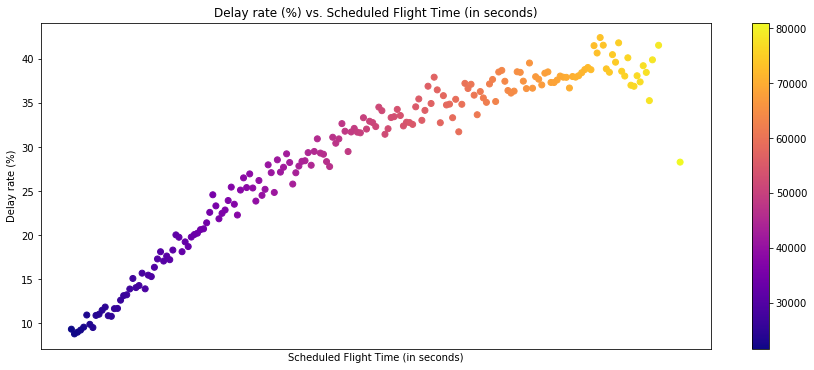

In [216]:
plt.figure(figsize=[15,6])
plt.scatter(data=delayed_flights_by_dep_time, x='CRSDepTime', y='Delayed (%)', c='CRSDepTime', cmap='plasma')
plt.xticks([])
plt.xlabel('Scheduled Flight Time (in seconds)')
plt.ylabel('Delay rate (%)')
plt.title('Delay rate (%) vs. Scheduled Flight Time (in seconds)')
plt.colorbar();

So definitely flight departure times affect delaying flights, with a minimum of around 10% and a maximum of around 45%, as we can see, early flights tend to get the lowest delay rates while late flights tend to get more delay rates

In [217]:
data = df_clean[df_clean['CRSDepTime'].isin(times)]
delayed_flights_by_dep_time = get_counts_percentages(data, 'CRSDepTime', 'Delayed')

In [218]:
delayed_flights_by_dep_time[delayed_flights_by_dep_time['CRSDepTime'] > "18:00:00"]['Delayed (%)'].median()

38.3776497978189

In [219]:
delayed_flights_by_dep_time[delayed_flights_by_dep_time['CRSDepTime'] <= "18:00:00"]['Delayed (%)'].median()

27.929436388099866

So late flights, typically after 6 PM have a chance of 38% that they get delayed whereas if your flight is before or on 6 PM there's a chance of 28% that this flight will be delayed.

Lastely, let's check if a diverted flight is more lilely to get delayed or cancelled

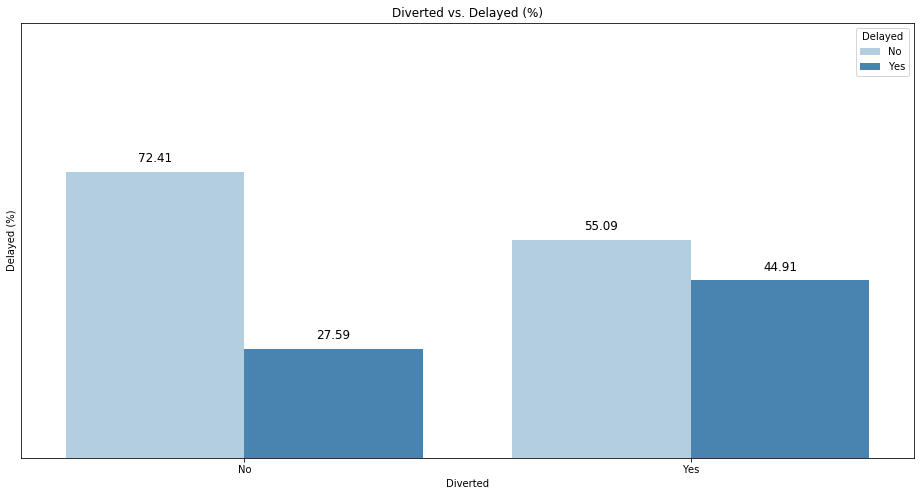

In [220]:
bar_by_column('Diverted', 'Delayed')
ticks = ['No', 'Yes']
plt.xticks(range(len(ticks)), ticks);

As expected, a diverted flight is more likely to be delayed compared to a normal flight, if the flight is diverted, there's 45% chance the flight will be delayed, whereas if the flight wasn't diverted, there's only 28% chance the flight will be delayed.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Many categorical features have relationships with the features of interest (i.e. `Delayed` and `Cancelled`), such as `UniqueCarrier, Origin, Dest, DayOfWeek, CRSDepTime and Diverted`. 

Those features (i.e. Carriers, Origins, Destinations, Day of the week, Scheduled departure time and Diverted) affect delaying flights greatly (discussed in details above), for example, on Friday's (from DayOfWeek feature) or after 6 PM (from CRSDepTime feature) flights tend to have higher delay rates than on other days or before 6 PM. In a similar manner, some carriers, origins or destinations tend to have more delay rates than others. For instance, carriers such as CD, AA, UA and WN have delay rates above 30% of their flights, while carriers like AQ and HA have delaying rates less than 12%.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Expected realtionships were found, such as the departure delay with arraival delay, because departure delay will cause delay for next flight and so on. Also, a big correlation between the three variables ElapsedTime, AirTime and Distance, since they all depend on each others with small defrences.

## Multivariate Exploration

In [221]:
# taking a sample of 1,000,000 instead of using the whole 7,000,000 records since it'd be so intensive to plot
samp = df_clean.sample(1000000)

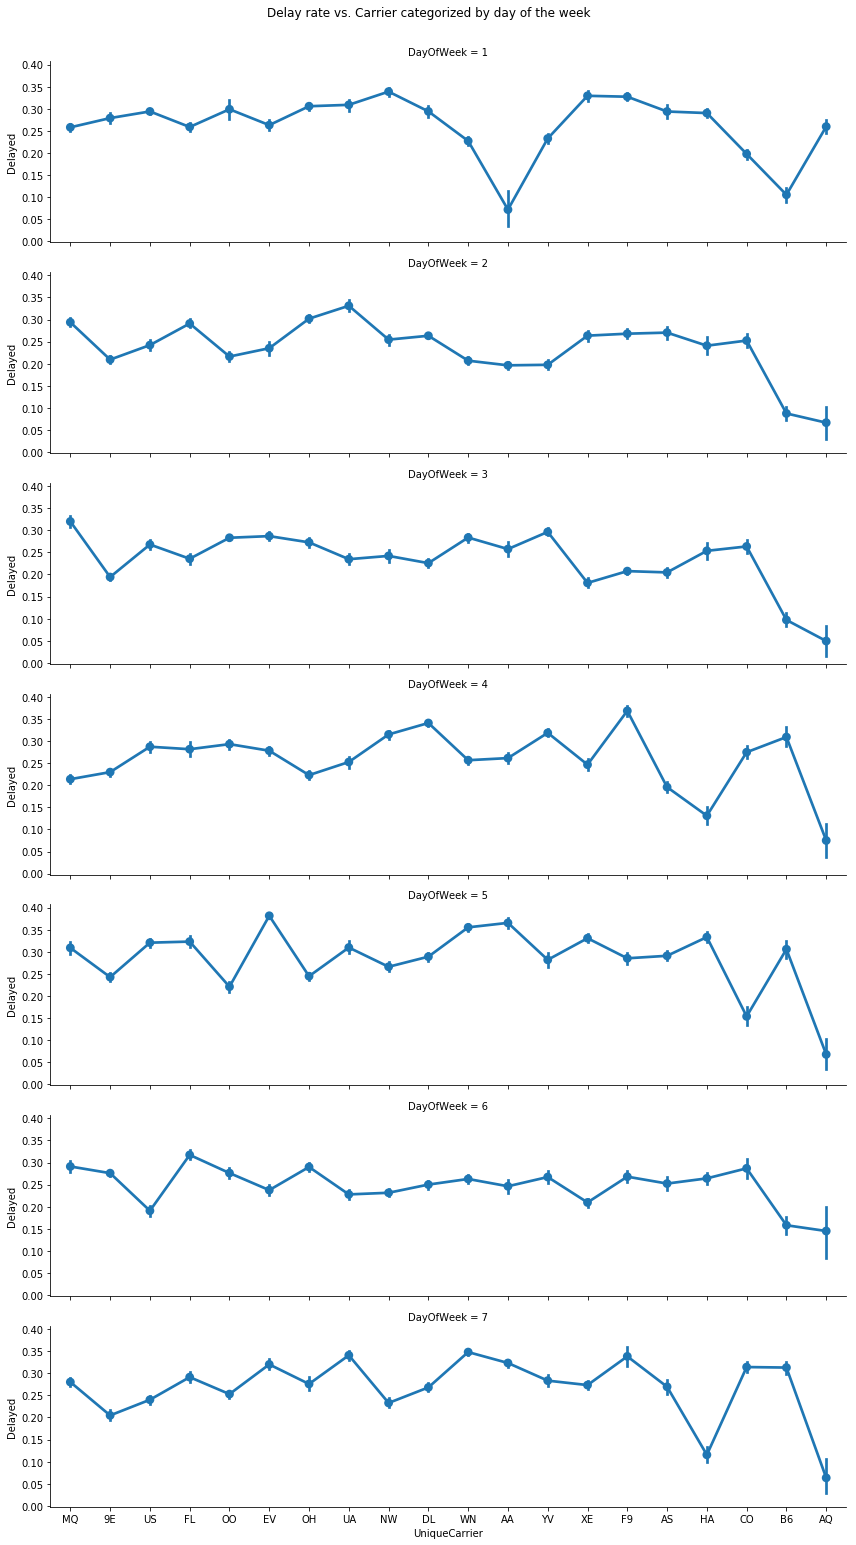

In [222]:
# Delayed, DayOfWeek, UniqueCarrier
g = sb.FacetGrid(data=samp, col='DayOfWeek', col_wrap=1, aspect=4)
g.map(sb.pointplot, 'UniqueCarrier', 'Delayed')
g.fig.suptitle('Delay rate vs. Carrier categorized by day of the week', y=1.02);

As we can see, some delay rates varry greatly if we categorize it by carrier and day of the week and some others varry but not as much. For example, on Friday's carrier HA has a delay rate around 10% while on Monday's it has a delay rate of 35%, and in the case of FL it generally has high delay rates almost all days of the week, and in the case of AQ, it has the lowest delay rates regardless of the day of the week.

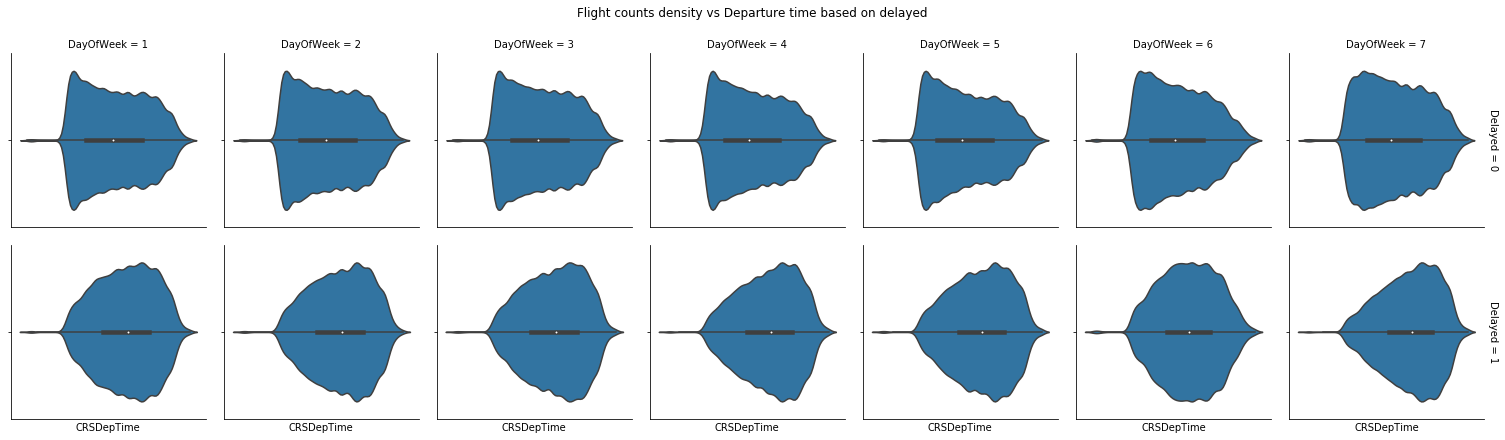

In [223]:
# Delayed, DayOfWeek, DepTime
samp.CRSDepTime = samp.CRSDepTime.astype('timedelta64[s]').sort_values()
g = sb.FacetGrid(data=samp, col='DayOfWeek', row='Delayed', margin_titles=True)
g.map(sb.violinplot, 'CRSDepTime');
g.set(xticks=[]);
g.fig.suptitle('Flight counts density vs Departure time based on delayed', y=1.05);

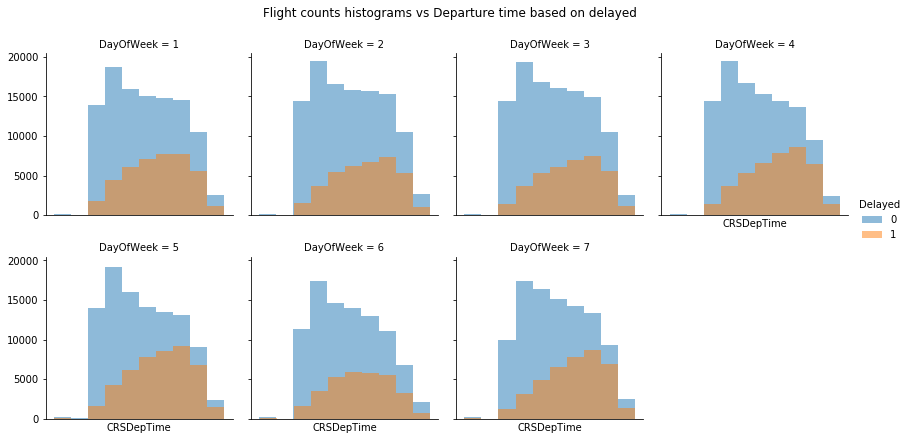

In [224]:
g = sb.FacetGrid(data=samp, col='DayOfWeek', hue='Delayed', height=3, col_wrap=4)
g = (g.map(plt.hist, 'CRSDepTime', alpha=.5).add_legend())
g.set(xticks=[]);
g.fig.suptitle('Flight counts histograms vs Departure time based on delayed', y=1.05);

So clearly from the violinplot and the histograms, day of the week doesn't affect the delay rate based on the departure time, on almost all days, high delay rates are skewed to the right, while low delay rates are skewed to the left, meaning, late departure times have high delay rates while early departure times have low delay rates relatively.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

As mentioned earlier, flights delay rates vary based on the carriers and the day of the week greatly for some carriers while not as much for others. An example for that is if we consider the carrier HA on Friday's is averaging 10% delay rate while on Mondays the same carrier has a delay rate of 35%. 

Other than that the way that departure times were affecting flights delay rate didn't change when categorized them by the day of the week. Which supports what we observed before about the strong relationship between departure times and flights delay rates.

### Were there any interesting or surprising interactions between features?

Yes, some carriers seem to act differently based on the day of the week while some others are consistent. This might be due to the fact that some carriers are following consistent professional working standards while others tend to be less professional by the end of the week.